# 算法分析

**为啥要做算法分析?**

- 我们需要有一种方式来谈论和选择不同的算法

- 足够"粗糙"以避免架构, 语言, 编译器等等系统因素的干扰

## 看一个问题

在有序列表s中找出x

### 定义第一种算法

从第一个开始依次往上找, 直到找到x, 否则x在队列中不存在.

这种办法叫 **简单查找**, 也叫**线性查找 (linear search)**

In [0]:
def linear_search(x, sequence):
  """在sequence中查找x, 并返回其下标, 没有就返回空(python中叫做None, 其他语言如C++叫做NULL)
  
  :param x: 待查找的数字
  :param sequence: 需要找x的队列
  :return: x的下标或者None
  """
  for i, val in enumerate(sequence):
    if val == x:
      return i
  return None

试验一下:

In [14]:
# 定义队列s

s = list(range(10_000_000))

# 列出s中的前10项
print(*s[:5], sep=', ')

x = 1_000_000
idx = linear_search(x, s)

print("找到的答案为:", idx)

0, 1, 2, 3, 4
找到的答案为: 1000000


这种办法的问题: 

在每次检查中都只排除了一个数字, 如果想找的恰好是列表中最后一个, 那么你需要检查整个列表

### 更好的办法

下面是一种更好的办法, 从中间开始. 通过判断它与x的大小关系就能确定列表中一半的元素与x的大小关系, 从而每次检查都能排除当前队列中一半的元素, 从而快速锁定x该在的位置. 

这种办法叫**二分查找 (binary search)**

In [0]:
def binary_search(x, sequence):
  current_range_lower, current_range_upper = 0, len(sequence) - 1
  center = int((current_range_lower + current_range_upper) / 2)
  center_val = sequence[center]
  while center_val != x:
    if current_range_lower >= current_range_upper:
      return None
    
    if center_val > x:
      current_range_upper = center - 1
    else:
      current_range_lower = center + 1
    center = int((current_range_lower + current_range_upper) / 2)
    center_val = sequence[center]
  return center

试验一下新方法:

In [16]:
s = [i * 2 for i in range(1000000)]
idx = binary_search(999997, s)

print("找到的答案为:", idx)

找到的答案为: None


比较两种方法的结果

In [17]:
# 制造一个100万长度的偶数序列
sequence = [i * 2 for i in range(1_000_000)]

# 随机创建一个查找任务
import random
x = random.randint(0, 2_000_000)

# 比较两个算法的结果
result_1 = linear_search(x, sequence)
result_2 = binary_search(x, sequence)

print("任务x={}:\n线性查找: {}, 二分查找: {}".format(x, result_1, result_2))

任务x=779092:
线性查找: 389546, 二分查找: 389546


比较两种方法所消耗的时间

In [18]:
"""Jupyter notebook 中的magic commands"""

%timeit \
_ = linear_search(x, sequence)

%timeit \
_ = binary_search(x, sequence)

10 loops, best of 3: 20.1 ms per loop
100000 loops, best of 3: 5.8 µs per loop


In [9]:
"""常规实现方法"""

from datetime import datetime

# 第一种方法所消耗的时间
tick = datetime.now()
_ = linear_search(x, sequence)
tock = datetime.now()
time_1 = (tock - tick).total_seconds()

# 第二种方法所消耗的时间
tick = datetime.now()
_ = binary_search(x, sequence)
tock = datetime.now()
time_2 = (tock - tick).total_seconds()

print("任务x={}:\n线性查找: {}秒, 二分查找: {}秒".format(x, time_1, time_2))

任务x=1045056:
线性查找: 0.040747秒, 二分查找: 5.7e-05秒


## 评估算法

对于这个问题, 一旦保证算法是正确的, 那么重要的一步就是确定该算法将需要多少时间或空间等资源量的问题. 如果一个问题的求解算法需要长达一年时间, 那么这种算法就很难在应用中得到体现.

估计算法资源消耗所需的分析一般来说是一个理论问题, 我们永远无法准确地计算出实际所需的时间, 因此需要一套正式的系统构架

### 操作数

我们定义$T(n)$为算法执行的操作数, 其中$n$为算法中数据的规模. 

In [0]:
a = 0  # 操作数=1

# 操作数=1000 * (1 + 1) = 2000
for i in range(1000):
  a = 0
  b = 1

linear_search中问题的规模为列表的长度, 设为$n$. 那么linear_search的操作数:

In [0]:
def linear_search(x, sequence):
  for i, val in enumerate(sequence):
    if val == x:  # 操作数 = 2 (条件运算1 + 判断运算1)
      return i    # 操作数 = 1
  return None     # 操作数 = 1

总操作数如下:
$$T_{LS}(n) \leq n(2+1) + 1 \approx 3n + 1$$

***思考*** 为什么这里是小于等于的关系?

binary_search的操作数为:

In [0]:
def binary_search(x, sequence):
  current_range_lower, current_range_upper = 0, len(sequence) - 1  # 计算长度1 + 赋值1 + 赋值1 = 3
  center = int((current_range_lower + current_range_upper) / 2)    # 加法1 + 除法1 + 取整1 + 赋值1 = 4
  center_val = sequence[center]                                    # 取值1 + 赋值1 = 2
  while center_val != x:
    if current_range_lower >= current_range_upper:                 # 条件计算1 + 判断1
      return None                                                  # 返回1
    
    if center_val > x:                                             # 2
      current_range_upper = center - 1                             # 2
    else:
      current_range_lower = center + 1                             # 2
    center = int((current_range_lower + current_range_upper) / 2)  # 4
    center_val = sequence[center]                                  # 2
  return center                                                    # 1

$$
T_{BS}(n) = 3 + 4 + 2 + (2 + 1 + 2 + 2 + 2 + 4 + 2)log_2{n} + 1 = 15log_2n+10
$$

***思考*** 为什么这里是$log_2n$

## 比较T(n)

在科学计算中一般使用2为对数的底, 但在程序设计中默认的对数运算为自然对数$log_en$, 所以需要使用到对数的换底公式
$$
log_ab={log_cb \over log_ca}
$$

以n为自变量, 画出$T_{LS}(n)$与$T_{BS}(n)$

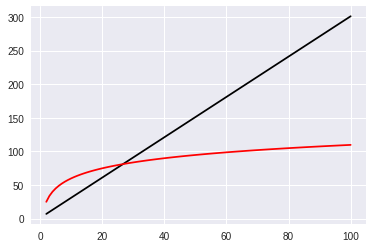

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def log(a, b):
  return np.log(b) / np.log(a)

def T_LS(n):
  return 3 * n + 1


def T_BS(n):
  return 15 * log(2, n) + 10


n = np.array([i + 1 for i in range(1, 100, 1)])
t1 = T_LS(n)
t2 = T_BS(n)

plt.plot(n, t1, '#000000')
plt.plot(n, t2, '#ff0000')
plt.show()

我们发现当$n=20$时, t1 < t2, 当n=40时, t1 > t2. 且t1的增长速度远大于t2.

### 启示

单纯比较$T(n)$意义并不大, 而应该比较他们的**相对增长率**. 很显然, 从上面的例子中能看出二者的**相对增长率**有非常大的差别, 但缺乏一种系统的表达方式来描述这一差异.

## 时间复杂度 - The big O notation


### 一些数学定义

1. 如果存在正常数$c$和$n_0$使得当$N \geq n_0$时, $T(N) \geq cf(N)$, 则记
$$T(N)=O(f(N))$$

2. 如果存在正常数$c$和$n_0$使得当$N \geq n_0$时, $T(N) \leq cf(N)$, 则记
$$T(N)=\Omega(f(N))$$

3. 若$T(N)=O(f(N))$且$T(n)=\Omega(f(N))$, 则记
$$T(N)=\Theta(f(N))$$

**解读**

1. $T(N)$的增长率小于等于$f(N)$的增长率

2. $T(N)$的增长率大于等于$f(N)$的增长率

3. $T(N)$的增长率等于$f(N)$的增长率

### 一些例子

* $T(n)=3n^2+4n+1=O(n^2)$

* $T(n)=4(n+1) + \sqrt{n-1} + 10000=O(n)$

* $T(n)=2log_2(3n)+log_3n=O(logn)$

### 一些规律总结

* 如果$T(n)$是一个$k$次多项式, 那么$T(n)=\Theta(N^k)$

* 如果$T_1(N)=O(f(N)), T_2(N)=O(g(N))$, 那么:

  * $T_1(N)+T_2(N)=max\{  O(f(N)), O(g(N))    \}$
  * $T_1(N) * T_2(N) = O(f(n) \times g(n))$
  
* 对任意常数$k, log^kN=O(N)$

当某算法的操作数$T(n)=\Theta(f(n))$时, 我们称该算法的时间复杂度为$\Theta(f(n))$. 

在实际使用和习惯中, 由于$T(n)=O(f(n))$含义为$f(n)$是$T(n)$的上限, 我们更多时候会将$\Theta$替换为$O$, 称该算法的时间复杂度为$O(f(n))$.

例如:

我们常说快速排序算法的时间复杂度为$O(n log{n})$, 实际上快速排序的$T(n)=\Theta(n log n)$

### 一句话求复杂度

"消去常数, 只保留最高次项"

## The Master Theorem (a.k.a the Master Method) 主定理

在评估递归算法的时间复杂度时, 我们往往无法直接写出该算法的操作数函数$T(n)$, 但可以写成如下递推式:

$$T(n) = aT({n \over b}) + O(n^d)$$

### 解读

- a = 递归调用次数 (a ≥ 1)
- b = 数据规模缩小速度 (b > 1)
- d = 递归调用外对当前数据的处理相对于当前规模$n$的复杂度指数
- a, b, d皆与$n$独立

### 公式

$$
T(n)=
\begin{cases}
O(n^dlogn)& ,\text{if } a=b^d\\
O(n^d)& ,\text{if } a < b^d\\
O(n^{log_ba})& ,\text{if } a > b^d
\end{cases}
$$

### 举例

#### 二分查找

$a=1, b=2, d=0, b^d=1=a$, 属于Case 1, $T(n)=O(n^dlogn)=O(n^0logn)=O(logn)$

#### 快速排序

$a = 2, b = 2, d = 1, b^d=2=a$, 属于Case 1, $T(n)=O(n^dlogn)=O(n^1logn)=O(nlogn)$

#### 二叉树遍历

$a = 2, b = 2, d = 0, b^d=1<a$, 属于Case 3, $T(n)=O(n^{log_ba})=O(n^{log_22})=O(n^1)=O(n)$

## 算法的比较

假设有两个算法, 其复杂度分别为$T_1(n)=O(f(n))$和$T_2(n)=O(g(n))$. 比较它们的时间效率方法如下:

$$
相对增长率r=\lim_{n\to\infty} {f(n) \over g(n)}
$$

**注意** 当 $\lim_{n\to\infty} f(n) = \infty$且$\lim_{x\to\infty} g(n)=\infty$时, 需应用l'Hospital's rule.

### L' Hospital's Rule - 洛必达法则

$$
\lim_{n\to\infty} {f(n) \over g(n)} = \lim_{n\to\infty} {f'(n) \over g'(n)}
$$

增长率$r$的范围所含意义如下:

* $r = 0$: 算法1比2快
* $r=c\neq0$: 两个算法复杂度一样
* $r=\infty$: 算法1比2慢
* $r$不收敛: 两个算法无关